<a href="https://colab.research.google.com/github/AnnaGolovaha/Yandex_NLP_course/blob/main/week_02/homework_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Новый раздел

### Homework part I: Prohibited Comment Classification (3 points)

![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

В этой тетради вы создадите алгоритм, который будет классифицировать комментарии в социальных сетях на нормальные и токсичные. Как и во многих реальных случаях, у вас есть только небольшой (10^3) набор данных с вручную помеченными примерами для работы. Мы решим эту проблему, используя как классические методы NLP, так и подход, основанный на встраивании.

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/NLP_course/week_2/comments.tsv", sep='\t') #sep='\t' - разделитель табуляция

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]
# data.head()

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)
#  random_state=42 для перемешивания данных перед их разделением
texts_train.shape

(500,)

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

Как правило, рекомендуется разделить данные на обучающие/тестовые, прежде чем с ними что-либо делать.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

Это защитит вас от возможной утечки данных на этапе предварительной обработки. Например, если вы решите выбрать в качестве признаков слова, присутствующие в нецензурных твитах, вам следует учитывать только эти слова в обучающем наборе. В противном случае ваш алгоритм может обмануть оценку.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

Комментарии содержат необработанный текст со знаками препинания, прописными/строчными буквами и даже символами новой строки.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

Чтобы упростить все дальнейшие шаги, мы разобьем текст на токены, разделенные пробелами, с помощью одного из токенизаторов nltk.

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
# preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower())) #text - тут хранятся значения комментариев из таблицы
preprocess = lambda text: ' '.join(tokenizer.tokenize(text)).lower() #более правильная запись


text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [ ]:
# task: preprocess each comment in train and test
# один из способов - использовать np.vectorize- преобразует обычную функцию Python в функцию, которую можно применить к массивам numpy

fun_preprocess_np = np.vectorize(preprocess)
texts_train = fun_preprocess_np (texts_train)
texts_test = fun_preprocess_np (texts_test)

# другой способ - использовать циклы
# texts_train = [preprocess(s) for s in texts_train]
# texts_test = [preprocess(s) for s in texts_test]

In [ ]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Solving it: bag of words

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

Один из традиционных подходов к такой проблеме — использовать функции «мешка слов»:
1. Создайте словарь часто встречающихся слов (используйте только данные train)
2. для каждой обучающей выборки подсчитать, сколько раз в ней встречается слово (для каждого слова в словаре).
3. считать этот счетчик особенностью какого-то классификатора

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.

На практике вы можете вычислить такие функции с помощью sklearn.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [ ]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)

# задача: найти до k наиболее часто встречающихся токенов в texts_train,
# сортируем их по количеству вхождений (сначала самое большое)

k = 10000

from collections import Counter
bow_vocabulary = Counter() #это и будет наш словарь


for phrase in texts_train:
  for token in phrase.split():
    bow_vocabulary[token] +=1 #здесь хранится словарь



bow_vocabulary = bow_vocabulary.most_common(k) #возвращает n наиболее часто встречающихся элементов, в порядке убывания встречаемости.
# [('.', 1513), (',', 1389), ('you', 1342)
# а здесь уже список кортежей
# bow_vocabulary = dict(bow_vocabulary)
bow_vocabulary = [a for a,b in bow_vocabulary]

print('example features:', bow_vocabulary) # sorted(bow_vocabulary)[::100])

example features: ['.', ',', 'you', 'the', '"', 'a', 'to', 'i', 'and', '!', 'is', 'of', '=', 'suck', 'that', 'in', 'hitler', 'heil', 'it', '(', ')', 'offfuck', '?', 'are', 'not', 'this', 'for', 'be', 'your', 'my', 'on', 'as', 'with', 'do', 'have', 'nigger', 'j.delanoy', 'me', ':', 'dick', 'or', 'was', 'if', 'article', 'at', 'know', 'but', 'because', 'all', 'what', 'page', 'an', 'so', '...', 'talk', 'by', 'wikipedia', 'one', 'he', 'they', 'can', 'like', 'no', 'from', 'will', 'has', 'would', "'", 'been', 'about', 'there', 'fggt', 'just', "don't", 'any', 'which', 'did', '2006', '-', 'time', 'who', 'when', 'july', 'we', 'hist', 'diff', 'please', 'how', 'people', '24', 'should', 'see', 'his', 'had', '|', 'them', 'here', 'up', 'think', 'also', 'other', 'before', 'some', ';', 'then', 'bitch', "i'm", 'am', 'make', 'why', 'out', 'being', 'may', 'user', 'only', 'fuck', '/', 'more', "it's", 'use', 'articles', 'again', 'does', 'their', 'even', 'now', 'edit', 'good', 'get', 'own', 'shit', 'were', '

In [ ]:
# bow - это мешок слов
# для каждого комментария получим список, в котором под индексом слова(индекс из bow_vocabulary, а не из предложения)
# стоит частота встречаемости текущего слова во всем комментарии
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """

    tokens = text.split() #список токенов из одного комментария??
    token_counts = np.zeros(len(bow_vocabulary))

    for token in tokens:
        if token in bow_vocabulary:
            index = bow_vocabulary.index(token) #получаем индекс в словаре (bow_vocabulary), под которым находится токен
                                                # наиболее частые слова находятся на меньших индексах
            token_counts[index] += 1 #под нужным индексом ставим 1 в списке
                                    # получаем список для каждого комментария??

    return np.array(token_counts, 'float32')


In [ ]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
# np.stack объединяет строки из списков (сверху вниз друг за другом)
# если не вставить np.stack, то получим много списков вместо одного
# X_train_bow - это список списков
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))


In [ ]:
# X_train_bow содержит 500 строк (столько комментариев) и 5707 столбцов (столько слов)
# Для каждого слова указна частота его встречаемости в данном комментарии
# То есть под одним индексом указана частота для одного и того же слова, но в разных строках для разных комментариев
X_train_bow.shape

(500, 5707)

In [ ]:
k_max = len(set(' '.join(texts_train).split())) #кол-во уникальных слов
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

In [ ]:
a = np.array([[1,2,4],
              [1,2,0],
              [1,2,2]])
b =np.array([0,0,2])
np.mean(a==3)
x = np.sum(a[b == 0], axis=0)
x
np.mean(a==1)


0.3333333333333333

In [ ]:
X_train_bow[4]

array([0., 5., 2., ..., 0., 0., 0.], dtype=float32)

__Naive bayes:__ perhaps the simplest model that can solve your problem is the so called Naive Bayes Classifier.
Its a trivial linear model that assumes the independence of input features and computes the coefficients by, well, counting probabilities.

возможно, самой простой моделью, которая может решить вашу проблему, является так называемый наивный классификатор Байеса. Это тривиальная линейная модель, которая предполагает независимость входных функций и вычисляет коэффициенты путем подсчета вероятностей.

If you don't remember the math behind Naive Bayes, read [this chunk](https://lena-voita.github.io/nlp_course/text_classification.html#naive_bayes) to help refresh your memory. Done? Good! Now let's implement that :)

In [ ]:
class BinaryNaiveBayes:
    delta = 1.0  # add this to all word counts to smoothe probabilities
                  # добавьте это ко всему количеству слов, чтобы сгладить вероятность

    def fit(self, X, y):
        """
        Fit a NaiveBayes classifier for two classes
        :param X: [batch_size, vocab_size] of bag-of-words features
        :param y: [batch_size] of binary targets {0, 1}
        """
        # first, compute marginal probabilities of every class, p(y=k) for k = 0,1
        # вычислить предельные вероятности каждого класса, p(y=k) для k = 0,1
        self.p_y = np.array([np.mean(y==0), np.mean(y==1)]) #получим список из двух вероятностей
        # np.mean(y==0) - кол-во y=0 поделенное на кол-во всех классов (len(y))
        # X_train_bow = X
        # y - таргеты для каждого отдельного комментария

        # count occurences of each word in texts with label 1 and label 0 separately
        # подсчитывать вхождения каждого слова в текстах с меткой 1 и меткой 0 отдельно
        # сделаем 2-мя разными способами

        word_counts_positive = np.zeros(X.shape[1]) #размер соответствует кол-ву всех слов 5707
        for i in range(len(y)): #идем по всем комментариям
          if y[i]==1: #комментарий позитивный
            for j in range(len(X[i])): #X[i] - строчка вида [9., 3., 1., для i-го коментария (позитивного)
              word_counts_positive[j]+=X[i][j] #получим массив, в кот. указано кол-во употреблений каждого слова для + комментариев
                                               #j - столбец, в котором находится частота встречаемости слова под индексом j в комментарии i
                                               #для каждого i-го комм-я записываем частоту всех слов

        word_counts_negative = np.sum(X[y == 0], axis=0) #поэлементное сложение строк, индексы строк выбираются по y == 0

        # ^-- both must be vectors of shape [vocab_size].
        # оба должны быть векторами формы [vocab_size].

        # finally, lets use those counts to estimate p(x | y = k) for k = 0, 1
        # это произведение вероятностей для каждого слова(х)
        vocab_size = X.shape[1] #количество слов
        self.p_x_given_positive = (self.delta + word_counts_positive)/(self.delta*vocab_size + np.sum(word_counts_positive))
        self.p_x_given_negative = (self.delta + word_counts_negative)/(self.delta*vocab_size + np.sum(word_counts_negative))
        # both must be of shape [vocab_size]; and don't forget to add self.delta!

        return self

    def predict_scores(self, X):
        """
        :param X: [batch_size, vocab_size] of bag-of-words features [кол-во комм-в, кол-во слов]
        :returns: a matrix of scores [batch_size, k] of scores for k-th class [комм-ии, класс комм-я]
        """
        # compute scores for positive and negative classes separately.
        # подсчитывать баллы (вероятности принадлежности к классу) для положительных и отрицательных классов отдельно
        # these scores should be proportional to log-probabilities of the respective target {0, 1}
        # эти оценки должны быть пропорциональны логарифмическим вероятностям соответствующей target {0, 1}
        # note: if you apply logarithm to p_x_given_*, the total log-probability can be written
        # as a dot-product with X
        # если вы примените логарифм к p_x_given_*, общая логарифмическая вероятность может быть записана как скалярное произведение с X

        score_negative = np.log(self.p_y[0]) + X@(np.log(self.p_x_given_negative))
        score_positive = np.log(self.p_y[1]) + X@(np.log(self.p_x_given_positive))

        # you can compute total p(x | y=k) with a dot product
        return np.stack([score_negative, score_positive], axis=-1)

    def predict(self, X):
        return self.predict_scores(X).argmax(axis=-1)

In [ ]:
naive_model = BinaryNaiveBayes().fit(X_train_bow, y_train)

In [ ]:
assert naive_model.p_y.shape == (2,) and naive_model.p_y.sum() == 1 and naive_model.p_y[0] > naive_model.p_y[1]
assert naive_model.p_x_given_positive.shape == naive_model.p_x_given_negative.shape == X_train_bow.shape[1:]
assert np.allclose(naive_model.p_x_given_positive.sum(), 1.0)
assert np.allclose(naive_model.p_x_given_negative.sum(), 1.0)
assert naive_model.p_x_given_negative.min() > 0, "did you forget to add delta?"

f_index = bow_vocabulary.index('fuck')  # offensive tweets should contain more of this
# вероятность встретить слово 'fuck' в положительном комментарии больше, чем вероятность встретить его в отрицательном комментарии.
assert naive_model.p_x_given_positive[f_index] > naive_model.p_x_given_negative[f_index]

g_index = bow_vocabulary.index('good')  # offensive tweets should contain less of this
assert naive_model.p_x_given_positive[g_index] < naive_model.p_x_given_negative[g_index]

Model accuracy: 0.756
Well done!


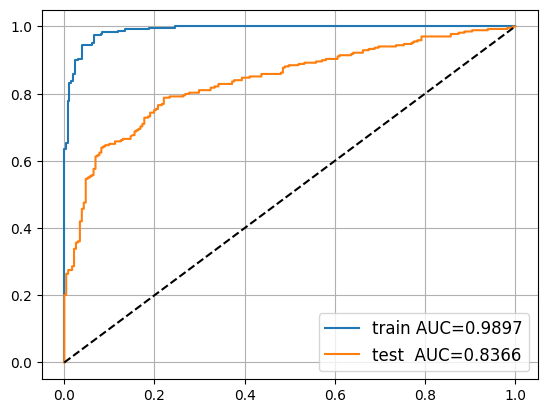

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, naive_model),
    ('test ', X_test_bow, y_test, naive_model)
]:
    proba = model.predict_scores(X)[:, 1] - model.predict_scores(X)[:, 0]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(naive_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.75, "Accuracy too low. There's likely a mistake in the code."
print("Well done!")

Okay, it definitely learned *something*. Now let's figure out what exactly it learned. The simplest way to do that is by highlighting which words have a greatest ratio of positive to negative probability or vice versa. We'll go with the positive one [because reasons](https://www.urbandictionary.com/define.php?term=because%20reasons).

Теперь давайте разберемся, чему именно оно научилось. Самый простой способ сделать это — выделить слова, которые имеют наибольшее соотношение положительной и отрицательной вероятности или наоборот. Мы выберем позитивный вариант, потому что есть причины.

__Your task__ is to compute top-25 words that have the __highest__ ratio of ${p(x_i | y=1)} \over {p(x_i | y=0)}$. Enjoy!

Задача состоит в том, чтобы вычислить топ-25 слов, которые имеют самый высокий коэффициент ${p(x_i | y=1)} \over {p(x_i | y=0)}$

In [ ]:
# hint: use naive_model.p_*
# bow_vocabulary - массив всех слов
probability_ratio =  naive_model.p_x_given_positive / naive_model.p_x_given_negative
indices_of_top_25 = np.argsort(-probability_ratio)[:25] #индексы 25-ти слов с наибольшим коэффициентом
top_negative_words =  np.take(np.array(bow_vocabulary), indices_of_top_25)# 25 слов с наибольшим коэффициентом вер-ти негативного?? класса

assert len(top_negative_words) == 25 and [isinstance(w, str) for w in top_negative_words]
assert 'j.delanoy' in top_negative_words and 'college' in top_negative_words

for i, word in enumerate(top_negative_words):
    print(f"#{i}\t{word.rjust(10, ' ')}\t(ratio={probability_ratio[bow_vocabulary.index(word)]})")

#0	    hitler	(ratio=475.4734410474474)
#1	      heil	(ratio=471.8065507565931)
#2	   offfuck	(ratio=441.2491316661401)
#3	      suck	(ratio=314.74141663166506)
#4	    nigger	(ratio=223.68030774211536)
#5	 j.delanoy	(ratio=220.013417451261)
#6	      dick	(ratio=187.01140483357185)
#7	      fggt	(ratio=97.78374108944934)
#8	     bitch	(ratio=59.89254141728772)
#9	      fuck	(ratio=53.78105759919713)
#10	      slap	(ratio=44.0026834902522)
#11	      shit	(ratio=44.0026834902522)
#12	   fucking	(ratio=31.779715854071032)
#13	       ass	(ratio=26.890528799598567)
#14	    stupid	(ratio=18.33445145427175)
#15	         =	(ratio=17.53995744092598)
#16	   college	(ratio=17.112154690653632)
#17	         *	(ratio=17.112154690653632)
#18	   asshole	(ratio=15.889857927035516)
#19	         u	(ratio=15.278709545226459)
#20	   bastard	(ratio=14.667561163417401)
#21	       hit	(ratio=14.667561163417401)
#22	         @	(ratio=13.445264399799283)
#23	     idiot	(ratio=13.445264399799283)
#24	 beautiful	(

Now lets try something less prehistoric: __Logistic Regression__. Turns out, if you're using silicon instead of an abacus, you can find model weights by optimizing the log-probability of the answer. Though, of course, you don't even need to write it by hand anymore. Let's sklearn it!

Теперь давайте попробуем что-то менее доисторическое: логистическую регрессию. Оказывается, если вы используете кремний вместо счетов, вы можете найти веса модели, оптимизируя логарифмическую вероятность ответа.

In [ ]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression(C = 0.14).fit(X_train_bow, y_train) #С - регуляризация, чем меньше значение, тем сильнее регул-я

Model accuracy: 0.772
Well done!


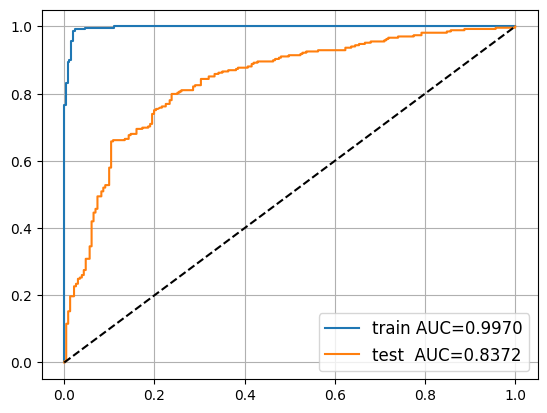

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(bow_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.77, "Hint: tune the parameter C to improve performance"
print("Well done!")

### Task: implement TF-IDF features

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequence__ and means exactly that:

Не все слова одинаково полезны. Можно отдать приоритет редким словам и уменьшить масштаб таких слов, как «и»/«или», используя функции tf-idf. Эта аббревиатура обозначает частоту текста/обратную частоту документа и означает именно это:

$$ feature_i = { Count(word_i \in x) \times { log {N \over Count(word_i \in D) + \alpha} }} $$


, where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1).And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

где x — один текст, D — ваш набор данных (набор текстов), N — общее количество документов, а α — гиперпараметр сглаживания.$Count(word_i \in D)$ — это количество документов, в которых встречается $word_i$.


It may also be a good idea to normalize each data sample after computing tf-idf features.

Также может быть хорошей идеей нормализовать каждую выборку данных после вычисления функций tf-idf.

__Your task:__ implement tf-idf features, train a model and evaluate ROC curve. Compare it with basic BagOfWords model from above.

Please don't use sklearn/nltk builtin tf-idf vectorizers in your solution :) You can still use 'em for debugging though.

реализовать функции tf-idf, обучить модель и оценить кривую ROC. Сравните ее с базовой моделью BagOfWords, приведенной выше.

Пожалуйста, не используйте встроенные векторизаторы tf-idf sklearn/nltk в своем решении :) Однако вы все равно можете использовать их для отладки.

In [ ]:
# TF - сколько раз слово встретилось в текущем комментарии
# IDF - число всех комментариев/число комм-ев с этим словом

from collections import Counter
bow_vocabulary_1 = Counter() #это и будет наш словарь

texts_train=texts_train.astype(str)

for comment in np.char.lower(texts_train):
  for token in comment.split():
    bow_vocabulary_1[token] +=1 #здесь хранится словарь слов с частотой их встречаемости
                              # для каждого слова указано кол-во комментариев, в которых оно есть

bow_vocabulary_1 # отсюда можем взять число комментариев с нужным словом
N = len(texts_train)
alpha = 1.
for k, v in bow_vocabulary_1.items():
  bow_vocabulary_1[k] = np.log((N/bow_vocabulary_1[k]))#+alpha)) #это и есть словарь с IDF



In [ ]:
def texts_to_tfidf(text):
  count_words_in_x = dict()

  for word in text.split(): #идем по словам
    count_words_in_x[word] = count_words_in_x.get(word,0) + 1
  # print(count_words_in_x) #получили для каждого комментария свой словарь
  for i in count_words_in_x:
    count_words_in_x[i] = count_words_in_x[i]*bow_vocabulary_1[i]
      # print(count_words_in_x[k])
  return np.array(list(count_words_in_x.values()), 'float32')


In [ ]:
X_train_bow = np.stack(list(map(texts_to_tfidf, texts_train)))
# X_test_bow = np.stack(list(map(texts_to_tfidf, texts_test)))

ValueError: all input arrays must have the same shape

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Solving it better: word vectors

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [ ]:
import gensim.downloader
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")

# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead. Ignore all further asserts.

In [ ]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.wv.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')

    <YOUR CODE>

    return features

assert np.allclose(
    vectorize_sum("who cares anymore . they attack with impunity .")[::70],
    np.array([ 0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

In [ ]:
X_train_wv = np.stack([vectorize_sum(text) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(text) for text in texts_test])

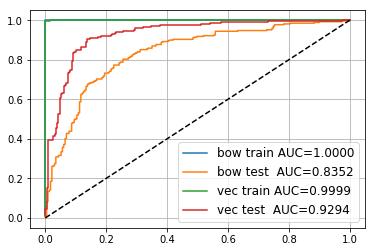

In [ ]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"

If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.